In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [45]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

In [46]:
Df=pd.DataFrame(x_train[0])



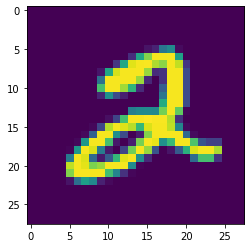

In [47]:
plt.imshow(x_train[5])
plt.show()

In [48]:
model=tf.keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
r=model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 12ms/step - loss: 0.2604 - accuracy: 0.9232 - val_loss: 0.1275 - val_accuracy: 0.9610
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0935 - accuracy: 0.9710 - val_loss: 0.1098 - val_accuracy: 0.9663
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0813 - val_accuracy: 0.9752
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 0.1070 - val_accuracy: 0.9704
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0839 - val_accuracy: 0.9766
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0938 - val_accuracy: 0.9768
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.1147 - val_accuracy: 0.9714

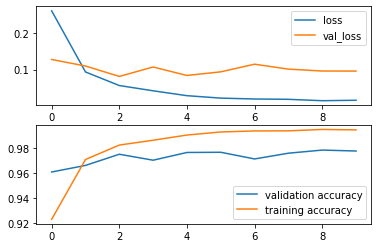

In [50]:
plt.subplot(2,1,1)
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.subplot(2,1,2)
plt.plot(r.history['val_accuracy'],label = 'validation accuracy')
plt.plot(r.history['accuracy'],label = 'training accuracy')
plt.legend()
plt.show()

In [51]:
y_pred=model.predict(x_test)

In [52]:
y_pred[0]

array([4.6275042e-10, 8.9941061e-08, 2.4968097e-07, 5.1692368e-06,
       1.1658706e-10, 2.8468052e-09, 3.6188180e-13, 9.9999452e-01,
       7.6138656e-10, 2.9048435e-08], dtype=float32)

In [53]:
y_pred_vals=np.round(y_pred).argmax(1)

In [54]:
cf_matrix=confusion_matrix(y_test,y_pred_vals)
print(cf_matrix)

[[ 961    1    2    2    4    0    5    2    2    1]
 [   0 1132    0    0    0    0    1    0    2    0]
 [   5    7 1003    2    3    0    0    7    5    0]
 [   2    0    4  992    0    5    0    3    3    1]
 [   1    0    2    0  965    1    2    2    2    7]
 [   2    0    0    6    1  878    3    0    2    0]
 [   4    2    0    0    6    6  937    0    3    0]
 [   2    4    6    0    0    0    0 1008    7    1]
 [   6    0    4    2    6    3    1    2  950    0]
 [   7    5    2   10   20    7    1    9    4  944]]


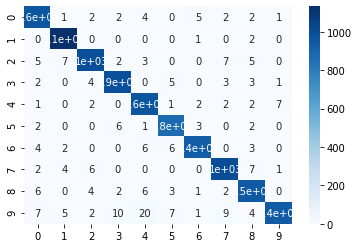

In [55]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True,cmap='Blues')
plt.show()

In [56]:
cf_matrix.diagonal().sum()/cf_matrix.sum()

0.977